We are going to learn more about data wrangling workflows and features of NumPy, pandas and other libraries.

pandas has developed a depth of features over these years.Let us discuss some here.

## Categorical Data

In [1]:
# Example to revise Pandas
import numpy as np; import pandas as pd

In [2]:
value = pd.Series(['apple','orange','apple','apple']*2)

In [3]:
value

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [4]:
pd.unique(value)

array(['apple', 'orange'], dtype=object)

In [5]:
pd.value_counts(value)

apple     6
orange    2
dtype: int64

In [6]:
value = pd.Series([0,1,0,1]*2)

In [7]:
value

0    0
1    1
2    0
3    1
4    0
5    1
6    0
7    1
dtype: int64

In [8]:
dm = pd.Series(['aaa','bbb'])

In [9]:
dm

0    aaa
1    bbb
dtype: object

In [10]:
dm.take(value) # Mapping the values of dm to value

0    aaa
1    bbb
0    aaa
1    bbb
0    aaa
1    bbb
0    aaa
1    bbb
dtype: object

In [11]:
# Let us understand Categorical Type in pandas
fruits = ['apple', 'orange', 'apple', 'apple'] * 2
N = len(fruits)
df = pd.DataFrame({'fruit': fruits,'basket_id': np.arange(N),
                   'count': np.random.randint(3, 15, size=N),
                   'weight': np.random.uniform(0, 4, size=N)},
                  columns=['basket_id', 'fruit', 'count', 'weight'])

In [12]:
df

,basket_id,fruit,count,weight
0,0,apple,3,1.338346
1,1,orange,14,0.291212
2,2,apple,3,2.329732
3,3,apple,11,0.533308
4,4,apple,6,3.791994
5,5,orange,13,3.929434
6,6,apple,13,3.947580
7,7,apple,6,2.463341


In [13]:
fruit_cat = df['fruit'].astype('category') # converted fruit into category

In [14]:
fruit_cat.dtype

CategoricalDtype(categories=['apple', 'orange'], ordered=False)

In [15]:
fruit_cat.values

[apple, orange, apple, apple, apple, orange, apple, apple]
Categories (2, object): [apple, orange]

In [16]:
fruit_cat.values.categories

Index(['apple', 'orange'], dtype='object')

In [17]:
fruit_cat.values.codes # you can convert dataframes categories to int

array([0, 1, 0, 0, 0, 1, 0, 0], dtype=int8)

## Computations with Categoricals
Lets consider the following example to understand.

In [18]:
np.random.seed(123)  # Random number when created will remain same throughout if we impliment seed
draws = np.random.randn(1000)

In [19]:
draws[:5]

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025])

In [20]:
# Binning of this data
bins = pd.qcut(draws, 4)

`pandas.qcut`(x, q, labels=None, retbins=False, precision=3,
duplicates='raise')

Quantile-based discretization function. Discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.

To understand qcut and cut, please visit https://pbpython.com/pandas-qcut-cut.html

In [21]:
bins

[(-3.2319999999999998, -0.685], (0.669, 3.572], (-0.0412, 0.669], (-3.2319999999999998, -0.685], (-0.685, -0.0412], ..., (-0.0412, 0.669], (0.669, 3.572], (-3.2319999999999998, -0.685], (-0.0412, 0.669], (-3.2319999999999998, -0.685]]
Length: 1000
Categories (4, interval[float64]): [(-3.2319999999999998, -0.685] < (-0.685, -0.0412] < (-0.0412, 0.669] < (0.669, 3.572]]

In [22]:
bins.codes[:10]

array([0, 3, 2, 0, 1, 3, 0, 1, 3, 0], dtype=int8)

We are going to categorize every quartile value according to its statistical value; so we can use groupby to extract some summary

In [23]:
bins = pd.Series(bins, name='quartile')
results = (pd.Series(draws).groupby(bins).agg(['count', 'min', 'max']).reset_index())

In [24]:
results

,quartile,count,min,max
0,"(-3.2319999999999998, -0.685]",250,-3.231055,-0.688549
1,"(-0.685, -0.0412]",250,-0.683226,-0.043042
2,"(-0.0412, 0.669]",250,-0.039329,0.668317
3,"(0.669, 3.572]",250,0.670512,3.571579


In [25]:
results['quartile']

0    (-3.2319999999999998, -0.685]
1                (-0.685, -0.0412]
2                 (-0.0412, 0.669]
3                   (0.669, 3.572]
Name: quartile, dtype: category
Categories (4, interval[float64]): [(-3.2319999999999998, -0.685] < (-0.685, -0.0412] < (-0.0412, 0.669] < (0.669, 3.572]]

If you want to increase overall performance gain, convert a particular datasets to categorical

In [26]:
N = 10000000
draws = pd.Series(np.random.randn(N))
labels = pd.Series(['foo', 'bar', 'baz', 'qux'] * (N // 4))

In [27]:
labels

0          foo
1          bar
2          baz
3          qux
4          foo
          ... 
9999995    qux
9999996    foo
9999997    bar
9999998    baz
9999999    qux
Length: 10000000, dtype: object

In [28]:
categories = labels.astype('category')

In [29]:
labels.memory_usage()

80000128

In [30]:
categories.memory_usage()

10000320

`As you can see that you can save a significant amount of memory is you convert datasets to categorical value`

In [31]:
import time
%time _ = labels.astype('category')

Wall time: 713 ms


pd.Series.cat.codes? # type this if you want to understand what it does

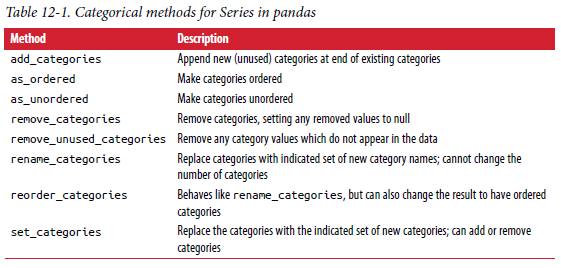

This is a very important topic `Creating dummy variables for modelling `

When you’re using statistics or machine learning tools, you’ll often transform categorical data into dummy variables, also known as one-hot encoding. This involves creating a DataFrame with a column for each distinct category; these columns contain 1s for occurrences of a given category and 0 otherwise

In [32]:
categ = pd.Series(['a', 'b', 'c', 'd'] * 2, dtype='category')

In [33]:
pd.get_dummies(categ)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


## Advanced GroupBy Use
Some of the groupby methods has already been discussed.Let us see some more applications 

### Group Transforms
This is another build-in method called transfrom, which is similar to apply. Some of its functions are

• It can produce a scalar value to be broadcast to the shape of 
the group

• It can produce an object of the same shape as the input group

• It must not mutate its input

Let us understand with a few example

In [34]:
df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,'value': np.arange(12.)})

In [35]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [36]:
group = df.groupby('key').value

In [37]:
group.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [38]:
group.transform(lambda x: x.mean()) # Lets us pass the function

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

Like apply, transform works with functions that return Series, but the result must be
the same size as the input. For example, we can multiply each group by 2 using a
lambda function

In [39]:
# Let us do the same by creating a function
def normalize(x):
    return (x - x.mean()) / x.std()

In [40]:
group.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [41]:
group.apply(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

### Grouped Time Resampling
This is particular for Time series data, where we will be using resample method to group operation based on time intervalization.
Lets understand this with an example

In [42]:
N=15
times = pd.date_range('2020-05-15 00:00', freq='1min', periods=N)
df = pd.DataFrame({'time': times,'value': np.arange(N)})

In [43]:
df

,time,value
0,2020-05-15 00:00:00,0
1,2020-05-15 00:01:00,1
2,2020-05-15 00:02:00,2
3,2020-05-15 00:03:00,3
4,2020-05-15 00:04:00,4
5,2020-05-15 00:05:00,5
6,2020-05-15 00:06:00,6
7,2020-05-15 00:07:00,7
8,2020-05-15 00:08:00,8
9,2020-05-15 00:09:00,9


In [44]:
df.set_index('time').resample('5min').count()

,value
time,
2020-05-15 00:00:00,5
2020-05-15 00:05:00,5
2020-05-15 00:10:00,5
